In order to judge my model's performance, I want to have a baseline to compare it to. I'll build a simple routine for predicting player performance without ML. Later on, I'll use this baseline to see if my model can do any better than this non-ML solution.

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
from helpers import score_model

In [3]:
baseline_df = pd.read_pickle('/Users/andrewpeters/GitHub/fpl/data/interim/df_with_rolling_features.pkl')

In [4]:
#simple system for predicting points
baseline_df['predicted_points'] = ((baseline_df['total_points_prev_9']*5) 
                          + (baseline_df['total_points_prev_5'])*3 
                          + (baseline_df['total_points_prev_3']*2))/10

In [5]:
#drop players who averaged less than 45 mins over the past three games

baseline_df['past_three_avg_mins'] = (baseline_df['minutes_prev'] + baseline_df['minutes_prev_2'] + baseline_df['minutes_prev_3'])/3
baseline_df = baseline_df[baseline_df['past_three_avg_mins'] > 45]

In [6]:
score_model(baseline_df)

Overall Score is: 3.9854035867130393
MAE over the entire dataset is: 2.329337609309147
MAE when a player earns more than 5pts is: 4.813436575414986


total_points               player                      team  position  gw    opponent_team was_home              kickoff_time  season  \
7                2.0        Dale_Stephens  Brighton and Hove Albion         3   4  Manchester City    False 2019-08-31 14:00:00+00:00  1920.0   
8                0.0             Dan_Burn  Brighton and Hove Albion         2   4  Manchester City    False 2019-08-31 14:00:00+00:00  1920.0   
10               2.0         Davy_Pröpper  Brighton and Hove Albion         3   4  Manchester City    False 2019-08-31 14:00:00+00:00  1920.0   
16               2.0     Leandro_Trossard  Brighton and Hove Albion         3   4  Manchester City    False 2019-08-31 14:00:00+00:00  1920.0   
18              -1.0           Lewis_Dunk  Brighton and Hove Albion         2   4  Manchester City    False 2019-08-31 14:00:00+00:00  1920.0   
...              ...                  ...                       ...       ...  ..              ...      ...                       ...     ...   
105220           1.0         Moritz_Bauer                Stoke City         2  38     Swansea City    False 2018-05-13 14:00:00+00:00  1718.0   
105221           9.0  Papa Alioune_Ndiaye                Stoke City         3  38     Swansea City    False 2018-05-13 14:00:00+00:00  1718.0   
105222           5.0         Peter_Crouch                Stoke City         4  38     Swansea City    False 2018-05-13 14:00:00+00:00  1718.0   
105224           2.0       Ryan_Shawcross                Stoke City         2  38     Swansea City    False 2018-05-13 14:00:00+00:00  1718.0   
105229           3.0      Xherdan_Shaqiri                Stoke City         3  38     Swansea City    False 2018-05-13 14:00:00+00:00  1718.0   

        minutes  total_points_prev  team_h_score_prev  team_a_score_prev  minutes_prev  goals_scored_prev  assists_prev  clean_sheets_prev  \
7          90.0                2.0                0.0                2.0          77.0                0.0           0.0                0.0   
8          90.0                1.0                0.0                2.0          90.0                0.0           0.0                0.0   
10         90.0                2.0                0.0                2.0          90.0                0.0           0.0                0.0   
16         73.0                2.0                0.0                2.0          90.0                0.0           0.0                0.0   
18         90.0                1.0                0.0                2.0          90.0                0.0           0.0                0.0   
...         ...                ...                ...                ...           ...                ...           ...                ...   
105220     90.0                0.0                1.0                2.0          90.0                0.0           0.0                0.0   
105221     90.0                1.0                1.0                2.0          90.0                0.0           0.0                0.0   
105222     90.0                2.0                1.0                2.0          66.0                0.0           0.0                1.0   
105224     90.0                1.0                1.0                2.0          90.0                0.0           0.0                0.0   
105229     90.0                8.0                1.0                2.0          90.0                1.0           0.0                0.0   

        goals_conceded_prev  bonus_prev  bps_prev influence_prev creativity_prev threat_prev ict_index_prev  transfers_balance_prev  selected_prev  \
7                       1.0         0.0      18.0            7.6             3.3           0            1.1                -12751.0       218446.0   
8                       2.0         0.0      10.0           14.6            12.6           2            2.9                  3285.0        13790.0   
10                      2.0         0.0      11.0             13             2.7           8            2.4     

<AxesSubplot:xlabel='total_points', ylabel='predicted_points'>

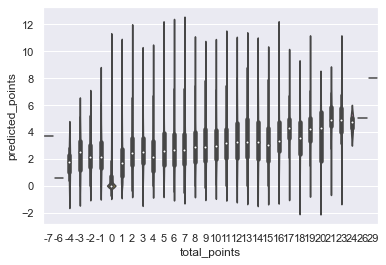

In [33]:
sns.violinplot(x='total_points', y='predicted_points', data=baseline_df)

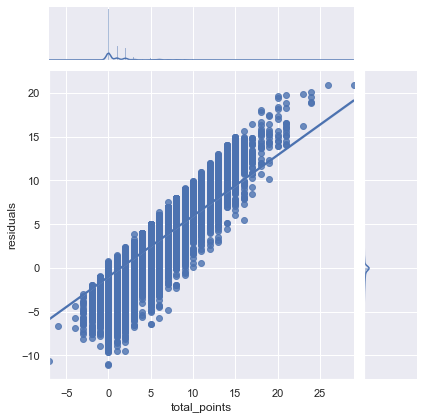

In [35]:
sns.jointplot(x ='total_points', y='residuals', data=baseline_df, kind='reg')